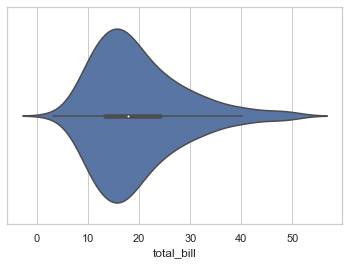

In [75]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=tips["total_bill"])


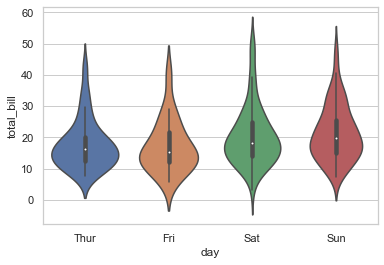

In [9]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [120]:
#### create datasets ###

# total tuning results
df= pd.DataFrame(columns=['h_layers', 'learning_rate', 'result'])

# lr = 1e-3
for result in [23, 14, 51 ,62, 24, 27, 30, 17, 35, 10, 20]:
    df = df.append({'h_layers': 1, 'learning_rate': 1e-3, 'result': result}, ignore_index=True)

# lr = 1e-5
for result in [24, 16, 57 ,68, 23, 26, 39, 16, 36, 15, 23]:
    df = df.append({'h_layers': 1, 'learning_rate': 1e-5, 'result': result}, ignore_index=True)

# lr = 1e-7
for result in [20, 10, 45 ,32, 12, 22, 23, 13, 25, 8, 16]:
    df = df.append({'h_layers': 1, 'learning_rate': 1e-6, 'result': result}, ignore_index=True)


In [111]:
df.to_pickle("results.pkl")


In [122]:
df

,h_layers,learning_rate,result
0,1.0,0.001000,23.0
1,1.0,0.001000,14.0
2,1.0,0.001000,51.0
3,1.0,0.001000,62.0
4,1.0,0.001000,24.0
5,1.0,0.001000,27.0
6,1.0,0.001000,30.0
7,1.0,0.001000,17.0
8,1.0,0.001000,35.0
9,1.0,0.001000,10.0


In [121]:
### Look for existing results, if not, make a new dataframe
try:
    df = pd.read_pickle("results.pkl")
except FileNotFoundError:
    df = pd.DataFrame(columns=['h_layers', 'learning_rate', 'result'])
    
df = df.append({'h_layers': 1, 'learning_rate': 1e-6, 'result': 22, 'parity': 0}, ignore_index=True)
df.to_csv("results.pkl")

UnpicklingError: invalid load key, ','.

In [124]:
# check
df

,h_layers,learning_rate,result
0,1.0,0.001000,23.0
1,1.0,0.001000,14.0
2,1.0,0.001000,51.0
3,1.0,0.001000,62.0
4,1.0,0.001000,24.0
5,1.0,0.001000,27.0
6,1.0,0.001000,30.0
7,1.0,0.001000,17.0
8,1.0,0.001000,35.0
9,1.0,0.001000,10.0


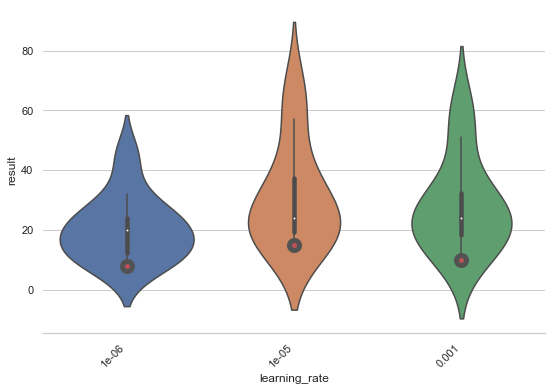

In [132]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x = 'learning_rate', y='result', data=df)


minimum = df.groupby('learning_rate').min().reset_index() 
sns.swarmplot(x = 'learning_rate', y='result', data=minimum, linewidth=10,  color='r')

_ = plt.xticks(rotation=45, ha='right')

sns.despine(left=True)
